# EDA validation 

In [1]:
import pandas as pd
from recsysUtility import RecSysUtility
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np

/home/andreafiandro/.local/lib/python3.8/site-packages/dask/array/random.py:25: FutureWarning: dask.array.random.doc_wraps is deprecated and will be removed in a future version
  warnings.warn(


## Carico il dataset e pulisco le colonne

In [2]:
rsUtils = RecSysUtility('/home/andreafiandro/NAS/training.tsv')

In [3]:
df_val = pd.read_csv('/home/andreafiandro/NAS/val.tsv', sep='\u0001', header=None, nrows=4000000)
df_val = rsUtils.process_chunk_tsv(df_val, isVal=True)

## Overview dei dati

In [4]:
print ('Test shape',  df_val.shape)

Test shape (4000000, 20)


In [5]:
df_val['Text_tokens_count'] = df_val['Text_tokens'].apply(lambda x: len(x.split('|')))
df_val['Hashtags'] = df_val['Hashtags'].astype('str').apply(lambda x: len(x.split('|'))-1)
df_val.head()

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Text_tokens_count
0,101|47185|10157|100986|10343|55422|119|14120|1...,0,7647B4E9DAF4C1D8973397DC2A04F3E3,Photo,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581703126,8A9AB92B775C62C4AB60DF6773A01571,...,1216,0,1448292186,0000006C3074607050F1339DDCB890BB,27448,600,0,1520948869,True,26
1,101|56898|137|10730|107105|59578|17394|17394|1...,0,408DB1803264B5FF55F73EC06BE9BD77,Photo|Photo|Photo|Photo,0,0,Retweet,B9175601E87101A984A50F8A62A1C374,1582021842,825B003667DF15692B1704F44DAFD1A2,...,100,0,1263078566,000013315386492275CCBF7AEF293EF0,139,956,0,1335110299,False,28
2,101|16735|11584|131|14120|131|120|120|188|119|...,0,2EE951379C47E8BF62EABB8FA027F753,GIF,0,0,TopLevel,2996EB2FE8162C076D070A4C8D6532CD,1581734918,2DEC09796D0EB473244CB7A4FB13A0A0,...,1,0,1356488269,00001569CB28972FC8173122D9DA162F,16,97,0,1503940711,False,20
3,101|56898|137|12127|43213|10245|168|10215|1011...,0,2135F24B05DAE3EF213F9CE80FDC6DAF,Photo|Photo|Photo,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581913613,487BCB8F1677A6D9EEE612940410CBB6,...,406,0,1449096567,00001607209C5774DF9207A2AC0EED5F,460,693,0,1396311956,True,39
4,101|11101|42780|10741|11222|10197|15304|10106|...,0,09143FEDE9BD494A6EA9A7EE160565E3,Photo,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581565745,C85C39DC8D279E51DF1BBF0391E5EB2E,...,273,1,1236181798,0000177705514C315F2FC6DFA3872712,468,3837,0,1298646801,False,27


### Quanti valori NaN ci sono?

In [6]:
# Controllo quanti NaN ci sono
pd.DataFrame(df_val.isnull().sum(axis=0).head(20)).T

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,Follower_count,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Quanti sono i valori unici per ogni variabile?

In [7]:
feats_counts = df_val.nunique(dropna = False)
pd.DataFrame(feats_counts.sort_values()).T

,Is_verified_engaging,Is_verified,Engagee_follows_engager,Tweet_type,Present_media,Hashtags,Language,Text_tokens_count,Following_count_engaging,Follower_count_engaging,...,Present_domains,Follower_count,Present_links,Timestamp,Account_creation_time,User_id,Text_tokens,Account_creation_time_engaging,User_id_engaging,Tweet_id
0,2,2,2,3,14,36,64,310,17391,31655,...,60351,240688,376481,597647,1594223,1598197,2822955,2899759,2915443,3226722


# Analisi singole features

## Hashtag

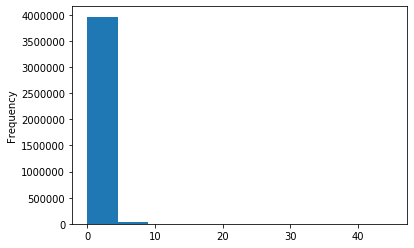

In [8]:
df_val['Hashtags'].plot(kind='hist')

## Text tokens

### Text_tokens

In [9]:
#df_val['Text_tokens'] = df_val['Text_tokens'].apply(lambda x: '|'.join(sorted(x.split('|'))))
pd.DataFrame(df_val['Text_tokens'].value_counts())

,Text_tokens
101|100|102,14976
101|102,768
101|9670|27023|61439|9568|119081|31503|137|118|137|106|114|14120|131|120|120|188|119|11170|120|171|12396|11403|10107|10884|10686|10350|10858|10638|102,411
101|9426|12508|25503|14120|131|120|120|188|119|11170|120|147|13520|11703|11565|13034|14703|11779|90772|102,399
101|13646|112|187|11590|142|83821|14120|131|120|120|188|119|11170|120|10608|12022|10237|11703|11259|11166|78043|11447|102,385
...,...
101|5667|1963|4470|1920|37133|60907|51143|15221|1882|119|119|3460|1923|5667|1962|47359|15802|1881|119|119|95154|100|3330|1906|1882|119|4476|3740|1943|3330|1906|1882|119|6461|82104|15355|119|2072|7168|1966|5760|7237|5318|1923|11312|1890|2329|1881|6180|4497|11592|14725|16867|6224|3446|7069|1915|1891|14813|10083|119|3235|1946|3350|15137|8462|1963|10083|119|6224|3446|7069|1915|18628|28224|1882|1929|111795|15752|111786|1882|119|5949|1940|2527|1911|48176|16867|19512|3770|1946|2195|2149|2222|31216|111822|21761|14803|99172|3820|12290|45714|2196|1946|3350|1940|6180|4497|11592|20058|10634|10083|119|119|100|2146|7165|1939|13894|22445|10055|102,1
101|100|784|11832|759|37548|12497|59901|35849|28241|10564|775|66709|49752|106803|26422|781|36334|10382|788|48711|23926|791|39197|37560|10382|784|11832|791|26897|10765|14695|791|10582|64488|789|82397|11832|13879|31898|54252|11693|769|21034|28089|10429|755|775|10502|36793|10961|59901|35849|49170|13154|59901|46240|16526|784|16498|30394|764|15909|59219|14695|791|39260|102211|787|82225|52516|793|29732|38116|11341|65968|33807|786|42519|10382|59901|72169|10765|11917|26213|13879|77198|10382|24738|791|26341|107852|26422|48486|787|91812|59901|37548|10700|79887|16333|90765|34707|119|119|119|108|100800|14695|168|21556|168|781|57008|10429|14120|131|120|120|188|119|11170|120|190|12022|10686|99808|10418|82678|10237|10237|102,1
101|10190|10182|10854|57646|10107|193|10104|10109|16488|89729|10126|86521|102,1
101|14120|131|120|120|188|119|11170|120|171|11369|93656|11779|10237|18686|10410|10115|102,1


In [10]:
df_val[df_val['Text_tokens'] == '100|101|102']['Tweet_type'].value_counts()

Series([], Name: Tweet_type, dtype: int64)

### Count

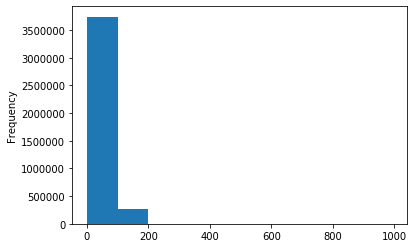

In [11]:
df_val['Text_tokens_count'].plot(kind='hist')

In [12]:
df_val['Text_tokens'].value_counts()[:10]

101|100|102                                                                                                                                                                                                                                            14976
101|102                                                                                                                                                                                                                                                  768
101|9670|27023|61439|9568|119081|31503|137|118|137|106|114|14120|131|120|120|188|119|11170|120|171|12396|11403|10107|10884|10686|10350|10858|10638|102                                                                                                   411
101|9426|12508|25503|14120|131|120|120|188|119|11170|120|147|13520|11703|11565|13034|14703|11779|90772|102                                                                                                                                       

## TweetID

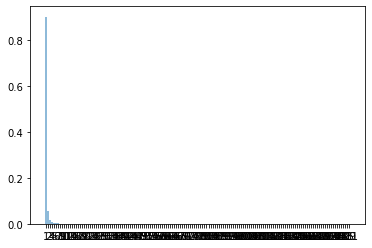

In [13]:
tweet_occ = df_val['Tweet_id'].value_counts().values
labels, counts = np.unique(tweet_occ, return_counts=True)
tot_el = counts.sum()
counts = [i / tot_el for i in counts]
y_pos = np.arange(len(labels))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

## Present links
Nota: si potrebbe costruire una feature a partire da un link che si ripete più volte
* File Feature per Link

In [14]:
df_val['Present_links'].value_counts()[:10]

0                                   3419271
E522B6C629B01DA6B29DE65BF5DFA55B        924
979B4F7F5C3B6AC61479D7E0070A2D17        869
140BCA0056E50C79778369C95D6DDC63        379
6F4FC1683D0D6FEC76DDBE6C699BCF10        348
52B4B186BC13C290B696BD5D304DA89A        273
180511B4A939ADAD39FDB6604C1A9AC5        261
4A939FCEAF42B180561F4B7D8ACE2406        260
608B880AE03A9C931AEF7F855D0118B4        252
FF3D932C8BDCBC65A6D0A834418B03FB        245
Name: Present_links, dtype: int64

## Tweet Type

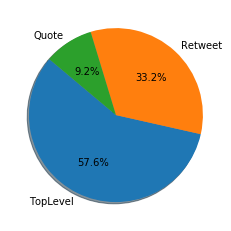

In [15]:
labels = df_val['Tweet_type'].value_counts().index.values
sizes = df_val['Tweet_type'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [16]:
df_val[df_val['Tweet_id'] == '97B2B88F6A4C30F67AD0868F8EBE5986']

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Text_tokens_count
12,101|56898|137|13977|15417|11490|27531|10291|13...,0,97B2B88F6A4C30F67AD0868F8EBE5986,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1582143240,D84B57C9B2077C327D5373C6C7795AE6,...,7985,0,1416142943,000052B88E27886C4DAEF585806A67BC,1136,1172,0,1520674893,True,42


### Possible dataleak

* Prendo tutti gli autori che sono anche user
* Filtro per gli autori che hanno condiviso un tweet di tipo Retweet
* Vado ad analizzare tra questi autori, l'azione precedente che hanno fatto, se i tweet corrispondono è un retweet

In [17]:
# Tutti gli autori che hanno condiviso un tweet
df_double = df_val[df_val['User_id'].isin(df_val['User_id_engaging'])]
# Tra questi autori -> Quanti hanno pubblicato un tweet di tipo retweet?
#retweet = df_double[df_double['Tweet_id'].isin(df_double[df_double['Tweet_type'] == 'Retweet']['Tweet_id'])].groupby('Tweet_id').count()
retweet = df_double[df_double['Tweet_type'] == 'Retweet']
retweet

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Text_tokens_count
91,101|56898|137|15033|10403|15926|14403|131|182|...,0,6429B3D47FA042CFDFFE934F73DD347F,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1582140843,63147DF8BCE9788C555D72F56F717612,...,4995,0,1455038132,000154DA6C3042A7DC9450FB6BFD936B,318,844,0,1425299226,True,12
171,101|56898|137|148|11259|11779|168|69342|82834|...,0,3AB339B47A286CA9AAB7071143144562,0,0,0,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581734997,2E7E5EA523C5889F4FEDE5A64CD39C3D,...,2405,0,1530508247,00028D01F5157B58C170B17CBDAC67D7,28,65,0,1460517180,True,30
173,101|56898|137|57087|12577|131|177|21213|15127|...,0,135A5FF446BF28B30CC578C0A9455490,Video,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1582067243,9A91339431430D7F6500B9845F3A9294,...,1924,1,1235444933,000290FBA37D89737B5D8BF29BBB56B7,58,406,0,1443721119,False,46
177,101|56898|137|91793|50924|11396|39900|11305|10...,0,98B37FB23646229A871D6163EDBACB43,Photo|Photo|Photo,0,0,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581981252,2A8915F8B0E27ACAF5387979FEC3B0B7,...,70,0,1499270493,0002A3D7A02C1D269FD136500342C274,5,50,0,1542378698,False,94
189,101|56898|137|153|82678|168|14057|131|12865|31...,0,3685FBD69192BABA61E292BB3D5B56E9,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1582053066,5F7DB40A4297850765CF22FCAD36A9EF,...,1339,1,1259007502,0002D6B94CAAF750A95AAB45023EAF3E,317,1243,0,1236636018,False,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999943,101|56898|137|109292|14678|36867|131|24362|105...,0,C5CFD0CEAE0DA7E8038EC1712BAD7E85,0,0,0,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581627958,4A21379F9DD438B37667E281C78C3563,...,10117,0,1343706031,236255209A340953D827931900A20566,648,815,0,1244072925,False,47
3999955,101|56898|137|190|35216|27561|10129|131|10192|...,0,0C555AD27022EC3C228E4AB773220888,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581838320,8B38D54BAAB7E65823C37F4567C6FF5D,...,590,0,1549581652,23628CF6C089D0458AC16A28BC8E49EB,24,312,0,1575619717,False,45
3999980,101|56898|137|13486|11490|21051|10162|11090|12...,0,E83D876B93A268866D79F984D69323F1,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581573912,1B7E82C47EE8B28CAA0FFDF2BDA0AAD5,...,13237,0,1237487652,2362E77876377EE920F4D8B5C2D3F0FA,4537,4945,0,1421257932,True,24
3999986,101|56898|137|10730|11537|10457|11369|11565|81...,0,4ABA6EBA5928D7263B6F57679F7964E3,Photo|Photo,0,0,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581606939,43027A4C00CBCB0AF5542CE6EAADAF9F,...,3746,0,1571910879,2362F5D0AD38DE24EF466B8F9354E4FB,3731,4327,0,1294985940,True,82


In [19]:
df_compare = retweet.merge(df_val[['User_id_engaging', 'Tweet_id', 'Text_tokens', 'Text_tokens_count']], left_on='User_id', right_on='User_id_engaging', suffixes=('_attuale', '_prec'))

In [23]:
df_compare[df_compare['Text_tokens_attuale'] == df_compare['Text_tokens_prec']].columns

Index(['Text_tokens_attuale', 'Hashtags', 'Tweet_id_attuale', 'Present_media',
       'Present_links', 'Present_domains', 'Tweet_type', 'Language',
       'Timestamp', 'User_id', 'Follower_count', 'Following_count',
       'Is_verified', 'Account_creation_time', 'User_id_engaging_attuale',
       'Follower_count_engaging', 'Following_count_engaging',
       'Is_verified_engaging', 'Account_creation_time_engaging',
       'Engagee_follows_engager', 'Text_tokens_count_attuale',
       'User_id_engaging_prec', 'Tweet_id_prec', 'Text_tokens_prec',
       'Text_tokens_count_prec'],
      dtype='object')

## User follow the author

In [ ]:
labels = df_val['Engagee_follows_engager'].value_counts().index.values
sizes = df_val['Engagee_follows_engager'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()